In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import matplotlib.ticker as ticker
import dataframe_image as dfi
warnings.filterwarnings('ignore')

%matplotlib inline

# 台灣ESG電動車低排放投資組合建構

## 匯入資料 &　日期處理

In [77]:
df = pd.read_excel("price.xlsx", header=0,engine='openpyxl')

In [78]:
df['年月'] = df['年月'].astype('str')
df['年月'] = df['年月'].str.replace('-','')
df['年月'] = df['年月'].str[0:6]

In [79]:
df.groupby('年月')['證券代碼'].count()

年月
201701     9
201702     9
201703     9
201704     9
201705     9
201706     9
201707     9
201708     9
201709     9
201710     9
201711     9
201712     9
201801     9
201802     9
201803     9
201804     9
201805     9
201806     9
201807     9
201808     9
201809     9
201810     9
201811     9
201812     9
201901    10
201902    10
201903    10
201904    10
201905    10
201906    10
201907    10
201908    10
201909    10
201910    10
201911    10
201912    10
202001    11
202002    11
202003    11
202004    11
202005    11
202006    11
202007    11
202008    11
202009    11
202010    11
202011    11
202012    11
Name: 證券代碼, dtype: int64

## 市值 & 平均加權

In [ ]:
# df['年'] = df['年月'].str[0:4]
# df['MktWeight'] = (df.groupby(['年','證券代碼'])['市值(百萬元)'].transform('sum').astype(int))/(df.groupby('年')['市值(百萬元)'].transform('sum').astype(int))
# df.loc[df['年'] == '2017', 'EqWeight'] = 1/9
# df.loc[df['年'] == '2018', 'EqWeight'] = 1/9
# df.loc[df['年'] == '2019', 'EqWeight'] = 1/10
# df.loc[df['年'] == '2020', 'EqWeight'] = 1/11

- 採用市值加權，權重過度集中於台積電
- 採用等權重加權，無法凸顯投資組合的特色
- 因此最後採用MSCI ESG Score加權

## MSCI ESG Score 加權

In [80]:
df['年'] = df['年月'].str[0:4]
df["MSCI ESG Score"] = df["MSCI ESG Score"].map({6:12, 5:7.5, 4:4, 3:2, 2:1})
df.dropna()
df["Weight"] = (df.groupby(["年","證券代碼"])["MSCI ESG Score"].transform('sum'))/(df.groupby('年')['MSCI ESG Score'].transform('sum'))
df.drop(['流通在外股數(千股)','市值(百萬元)'], axis=1, inplace=True)

In [81]:
# pd.reset_option("display.max_rows")

## 報酬計算

In [82]:
df['Return_M'] = df.groupby('證券代碼')['收盤價(元)_月'].pct_change()
df.dropna()

,證券代碼,公司,年月,收盤價(元)_月,MSCI ESG Score,年,Weight,Return_M
9,2002,中鋼,201702,22.53,4.0,2017,0.125000,0.019457
10,2301,光寶科,201702,39.53,4.0,2017,0.125000,0.091085
11,2308,台達電,201702,148.84,4.0,2017,0.125000,-0.017233
13,2330,台積電,201702,162.97,12.0,2017,0.375000,0.018881
15,2382,廣達,201702,51.37,2.0,2017,0.062500,0.001560
...,...,...,...,...,...,...,...,...
462,2357,華碩,202012,250.50,4.0,2020,0.077670,0.006024
464,2382,廣達,202012,80.90,4.0,2020,0.077670,0.050649
465,3481,群創,202012,14.10,2.0,2020,0.038835,0.402985
466,3711,日月光投控,202012,81.30,7.5,2020,0.145631,0.061358


In [83]:
df['WeightxReturn'] = df['Return_M']*df['Weight']

In [84]:
Port_return = df.groupby('年月')['WeightxReturn'].sum()

In [85]:
Port_return

年月
201701    0.000000
201702    0.016820
201703   -0.001044
201704    0.027468
201705    0.015998
201706    0.047902
201707    0.008146
201708    0.004484
201709   -0.028846
201710    0.026744
201711   -0.067589
201712    0.023314
201801    0.060812
201802   -0.040800
201803   -0.015014
201804   -0.089340
201805    0.000634
201806   -0.017480
201807    0.091060
201808    0.033754
201809    0.016085
201810   -0.079302
201811    0.018380
201812   -0.002135
201901    0.052683
201902    0.029334
201903    0.022888
201904    0.029207
201905   -0.090336
201906    0.038575
201907    0.048520
201908    0.016642
201909   -0.008104
201910    0.059112
201911    0.022945
201912    0.065458
202001   -0.044804
202002   -0.034548
202003   -0.118744
202004    0.115666
202005   -0.012886
202006    0.094130
202007    0.155521
202008   -0.028353
202009    0.005238
202010    0.004719
202011    0.109361
202012    0.094655
Name: WeightxReturn, dtype: float64

# 基金比較

## 0050 元大台灣50

In [86]:
df_0050 = pd.read_excel("Fund.xlsx", sheet_name = "0050", header=0,engine='openpyxl')

In [87]:
df_0050['年月日'] = df_0050['年月日'].astype('str')
df_0050['年月日'] = df_0050['年月日'].str.replace('-','')
df_0050['年月日'] = df_0050['年月日'].str[0:6]
df_0050.set_index("年月日", inplace = True)

In [88]:
df_0050['Return_M'] = df_0050['淨值(元)'].pct_change()

In [89]:
df_0050['Return_M_Cum'] = ( df_0050['Return_M']+1).cumprod()
df_0050.iloc[0,2] = 1

In [90]:
returns1 = pd.DataFrame(columns=["Port_return","0050"], index = Port_return.index)
returns1['Port_return'] = Port_return 
returns1['0050'] = df_0050['Return_M_Cum']
returns1['Port_return_Cum'] =  ( returns1['Port_return']+1).cumprod()
# returns1.drop(['Port_return'], axis=1, inplace=True)


(array([0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

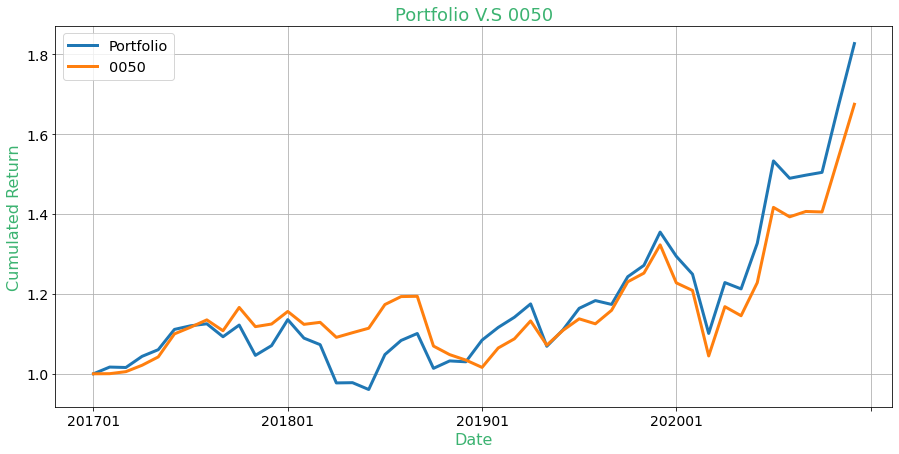

In [91]:
fig, ax = plt.subplots(figsize=(15,7))

plt.plot(returns1['Port_return_Cum'],label='Portfolio', linewidth=3)
plt.plot(returns1['0050'],label='0050' , linewidth=3)


ax.xaxis.set_major_locator(ticker.MultipleLocator(12))

plt.title('Portfolio V.S 0050',size = 18, color = 'mediumseagreen')
plt.xlabel('Date', fontsize=16, color = "mediumseagreen")
plt.ylabel('Cumulated Return', fontsize=16, color= "mediumseagreen")
plt.grid(True)
plt.legend(fontsize="x-large")
plt.xticks(fontsize=14 )
plt.yticks(fontsize=14 )
# plt.savefig("0050.png",dpi=150)

In [92]:
Geo_a_return = (returns1['Port_return_Cum']['202012'])**(12/len(returns1))-1
Geo_a_return_0050 = (returns1['0050']['202012'])**(12/len(returns1))-1

STD_return  = Port_return.std()*np.sqrt(12)
STD_return_0050   = df_0050['Return_M'].std()*np.sqrt(12)

Sharpe = Geo_a_return / STD_return 
Sharpe_0050 = Geo_a_return_0050 / STD_return_0050 

#計算MDD
D = returns1['Port_return_Cum'].cummax() - returns1['Port_return_Cum']
MDD = D.max()*1
d = D / (D + returns1['Port_return_Cum'])
mdd = d.max()

D = returns1['0050'].cummax() - returns1['0050']
MDD = D.max()*1
d = D / (D + returns1['0050'])
mdd_0050 = d.max()

#投組勝率
Odd =sum(Port_return>0)/len(returns1)

Odd_0050 =sum(df_0050['Return_M']>0)/len(returns1)

In [93]:
df_performance=pd.DataFrame([
                  [Geo_a_return,STD_return ,Sharpe,mdd,Odd ],
                  [Geo_a_return_0050,STD_return_0050 ,Sharpe_0050,mdd_0050,Odd_0050 ],
                 ])

In [94]:
df_performance.columns = [ 'ER','STD','Sharpe','Mdd','Odd' ]
df_performance.index =  ['Portfolio','0050']

In [95]:
df_performance.round(2)
# dfi.export(df_performance.round(2), '0050_table.png')

,ER,STD,Sharpe,Mdd,Odd
Portfolio,0.16,0.19,0.85,0.19,0.65
0050,0.14,0.18,0.77,0.21,0.65


## 00850 元大臺灣ESG永續

In [96]:
df_00850 = pd.read_excel("Fund.xlsx", sheet_name = "00850", header=0,engine='openpyxl')

In [97]:
df_00850['年月日'] = df_00850['年月日'].astype('str')
df_00850['年月日'] = df_00850['年月日'].str.replace('-','')
df_00850['年月日'] = df_00850['年月日'].str[0:6]
df_00850.set_index("年月日", inplace = True)

In [98]:
df_00850['Return_M'] = df_00850['淨值(元)'].pct_change()

In [99]:
df_00850['Return_M_Cum'] = ( df_00850['Return_M']+1).cumprod()
df_00850.iloc[0,2] = 1

In [100]:
df2 = df[df["年月"]>="201908"]
df2['Return_M'] = df2.groupby('證券代碼')['收盤價(元)_月'].pct_change()
df2.dropna()
df2['WeightxReturn'] = df2['Return_M']*df2['Weight']
Port_return2 = df2.groupby('年月')['WeightxReturn'].sum()

In [101]:
returns2 = pd.DataFrame(columns=["Port_return","00850"], index = Port_return2.index)
returns2['Port_return'] = Port_return2
returns2['00850'] = df_00850['Return_M_Cum']
returns2['Port_return_Cum'] =  ( returns2['Port_return']+1).cumprod()
# returns2.drop(['Port_return'], axis=1, inplace=True)

(array([0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

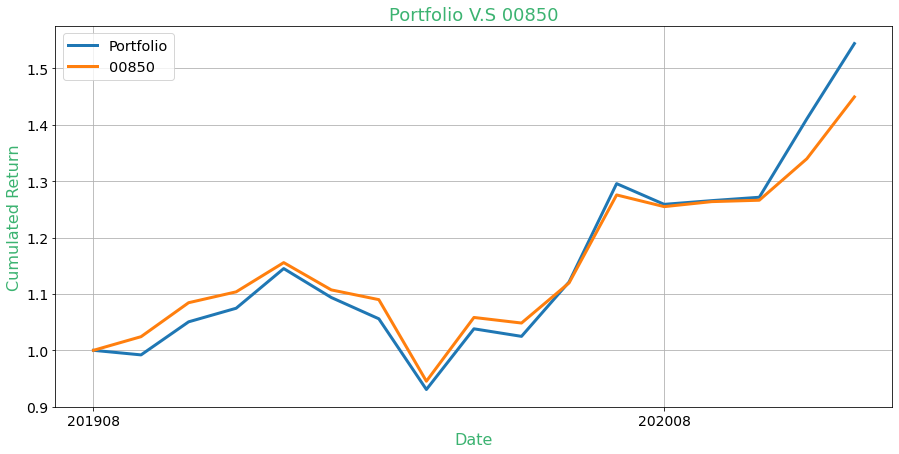

In [102]:
fig, ax = plt.subplots(figsize=(15,7))

plt.plot(returns2['Port_return_Cum'],label='Portfolio', linewidth=3)
plt.plot(returns2['00850'],label='00850' , linewidth=3)


ax.xaxis.set_major_locator(ticker.MultipleLocator(12))

plt.title('Portfolio V.S 00850',size = 18, color = 'mediumseagreen')
plt.xlabel('Date', fontsize=16, color = "mediumseagreen")
plt.ylabel('Cumulated Return', fontsize=16, color= "mediumseagreen")
plt.grid(True)
plt.legend(fontsize="x-large")
plt.xticks(fontsize=14 )
plt.yticks(fontsize=14 )
# plt.savefig("00850.png",dpi=150)

In [103]:
Geo_a_return = (returns2['Port_return_Cum']['202012'])**(12/len(returns2))-1
Geo_a_return_00850 = (returns2['00850']['202012'])**(12/len(returns2))-1

STD_return  = Port_return2.std()*np.sqrt(12)
STD_return_00850   = df_00850['Return_M'].std()*np.sqrt(12)

Sharpe = Geo_a_return / STD_return 
Sharpe_00850 = Geo_a_return_00850 / STD_return_00850 

#計算MDD
D = returns2['Port_return_Cum'].cummax() - returns2['Port_return_Cum']
MDD = D.max()*1
d = D / (D + returns2['Port_return_Cum'])
mdd = d.max()

D = returns2['00850'].cummax() - returns2['00850']
MDD = D.max()*1
d = D / (D + returns2['00850'])
mdd_00850 = d.max()

#投組勝率
Odd =sum(Port_return2>0)/len(returns2)
Odd_00850 =sum(df_00850['Return_M']>0)/len(returns2)

In [104]:
df_performance=pd.DataFrame([
                  [Geo_a_return,STD_return ,Sharpe,mdd,Odd ],
                  [Geo_a_return_00850,STD_return_00850 ,Sharpe_00850,mdd_00850,Odd_0050 ],
                 ])
df_performance.columns = [ 'ER','STD','Sharpe','Mdd','Odd' ]
df_performance.index =  ['Portfolio','00850']

In [105]:
# df_performance.round(2)
# dfi.export(df_performance.round(2), '00850_table.png')

## 00878 國泰永續高股息

In [106]:
df_00878 = pd.read_excel("Fund.xlsx", sheet_name = "00878", header=0,engine='openpyxl')

In [107]:
df_00878['年月日'] = df_00878['年月日'].astype('str')
df_00878['年月日'] = df_00878['年月日'].str.replace('-','')
df_00878['年月日'] = df_00878['年月日'].str[0:6]
df_00878.set_index("年月日", inplace = True)

In [108]:
df_00878['Return_M'] = df_00878['淨值(元)'].pct_change()

In [109]:
df_00878['Return_M_Cum'] = ( df_00878['Return_M']+1).cumprod()
df_00878.iloc[0,2] = 1

In [110]:
df3 = df[df["年月"]>="202007"]
df3['Return_M'] = df3.groupby('證券代碼')['收盤價(元)_月'].pct_change()
df3.dropna()
df3['WeightxReturn'] = df3['Return_M']*df3['Weight']
Port_return3 = df3.groupby('年月')['WeightxReturn'].sum()

In [111]:
returns3 = pd.DataFrame(columns=["Port_return"], index = Port_return3.index)
returns3['Port_return'] = Port_return3
returns3['00878'] = df_00878['Return_M_Cum']
returns3['Port_return_Cum'] =  ( returns3['Port_return']+1).cumprod()
# returns3.drop(['Port_return'], axis=1, inplace=True)

(array([0.9 , 0.95, 1.  , 1.05, 1.1 , 1.15, 1.2 , 1.25]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

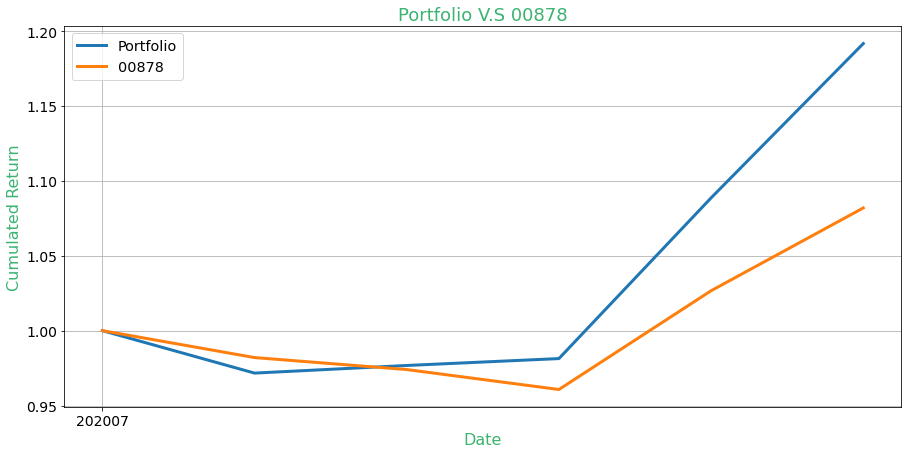

In [112]:
fig, ax = plt.subplots(figsize=(15,7))


plt.plot(returns3['Port_return_Cum'],label='Portfolio', linewidth=3)
plt.plot(returns3['00878'],label='00878' , linewidth=3)


ax.xaxis.set_major_locator(ticker.MultipleLocator(6))

plt.title('Portfolio V.S 00878',size = 18, color = 'mediumseagreen')
plt.xlabel('Date', fontsize=16, color = "mediumseagreen")
plt.ylabel('Cumulated Return', fontsize=16, color= "mediumseagreen")
plt.grid(True)
plt.legend(fontsize="x-large")
plt.xticks(fontsize=14 )
plt.yticks(fontsize=14 )
# plt.savefig("00878.png",dpi=150)

In [113]:
Geo_a_return = (returns3['Port_return_Cum']['202012'])**(12/len(returns3))-1
Geo_a_return_00878 = (returns3['00878']['202012'])**(12/len(returns3))-1

STD_return  = Port_return3.std()*np.sqrt(12)
STD_return_00878   = df_00878['Return_M'].std()*np.sqrt(12)

Sharpe = Geo_a_return / STD_return 
Sharpe_00878 = Geo_a_return_00878 / STD_return_00878 

#計算MDD
D = returns3['Port_return_Cum'].cummax() - returns3['Port_return_Cum']
MDD = D.max()*1
d = D / (D + returns3['Port_return_Cum'])
mdd = d.max()

D = returns3['00878'].cummax() - returns3['00878']
MDD = D.max()*1
d = D / (D + returns3['00878'])
mdd_00878 = d.max()

#投組勝率
Odd =sum(Port_return3>0)/len(returns3)
Odd_00878 =sum(df_00878['Return_M']>0)/len(returns3)

In [114]:
df_performance=pd.DataFrame([
                  [Geo_a_return,STD_return ,Sharpe,mdd,Odd ],
                  [Geo_a_return_00878,STD_return_00878 ,Sharpe_00878,mdd_00878,Odd_00878 ],
                 ])
df_performance.columns = [ 'ER','STD','Sharpe','Mdd','Odd' ]
df_performance.index =  ['Portfolio','00878']

In [115]:
df_performance.round(2)
# dfi.export(df_performance.round(2), '00878_table.png')

,ER,STD,Sharpe,Mdd,Odd
Portfolio,0.42,0.20,2.14,0.03,0.67
00878,0.17,0.14,1.19,0.04,0.33


## T4812A 合庫AI車聯網Aa

In [116]:
df_T4812A = pd.read_excel("Fund.xlsx", sheet_name = "T4812A", header=0,engine='openpyxl')

In [117]:
df_T4812A['年月日'] = df_T4812A['年月日'].astype('str')
df_T4812A['年月日'] = df_T4812A['年月日'].str.replace('-','')
df_T4812A['年月日'] = df_T4812A['年月日'].str[0:6]
df_T4812A.set_index("年月日", inplace = True)

In [118]:
df_T4812A['Return_M'] = df_T4812A['淨值(元)'].pct_change()

In [119]:
df_T4812A['Return_M_Cum'] = ( df_T4812A['Return_M']+1).cumprod()
df_T4812A.iloc[0, 2] = 1
df_T4812A

,淨值(元),Return_M,Return_M_Cum
年月日,,,
201903,9.998962,NaN,1.000000
201904,10.459836,0.046092,1.046092
201905,9.207461,-0.119732,0.920842
201906,10.029019,0.089227,1.003006
201907,10.008981,-0.001998,1.001002
201908,9.598202,-0.041041,0.959920
201909,9.728449,0.013570,0.972946
201910,9.928829,0.020597,0.992986
201911,10.359646,0.043391,1.036072


In [120]:
df4 = df[df["年月"]>="201903"]
df4['Return_M'] = df4.groupby('證券代碼')['收盤價(元)_月'].pct_change()
df4.dropna()
df4['WeightxReturn'] = df4['Return_M']*df4['Weight']
Port_return4 = df4.groupby('年月')['WeightxReturn'].sum()

In [121]:
returns4 = pd.DataFrame(columns=["Port_return","T4812A"], index = Port_return4.index)
returns4['Port_return'] = Port_return4
returns4['T4812A'] = df_T4812A['Return_M_Cum']
returns4['Port_return_Cum'] =  ( returns4['Port_return']+1).cumprod()
# returns4.drop(['Port_return'], axis=1, inplace=True)

(array([0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

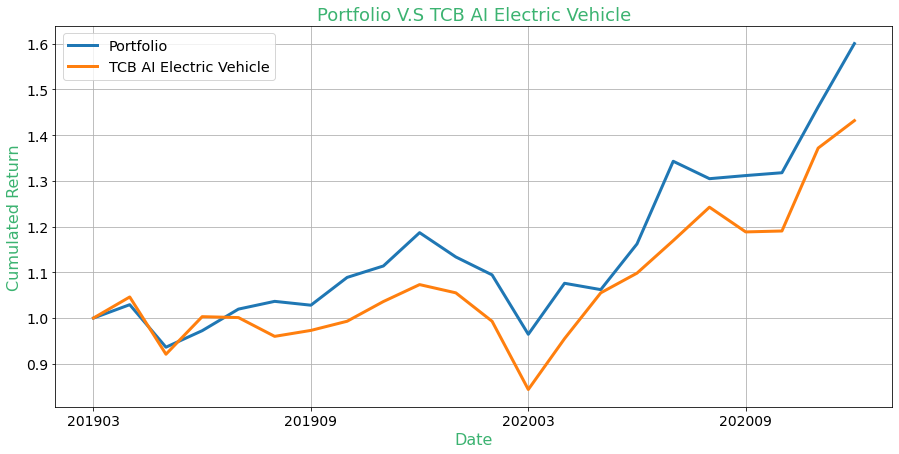

In [122]:
fig, ax = plt.subplots(figsize=(15,7))

plt.plot(returns4['Port_return_Cum'],label='Portfolio', linewidth=3)
plt.plot(returns4['T4812A'],label='TCB AI Electric Vehicle' , linewidth=3)


ax.xaxis.set_major_locator(ticker.MultipleLocator(6))

plt.title('Portfolio V.S TCB AI Electric Vehicle',size = 18, color = 'mediumseagreen')
plt.xlabel('Date', fontsize=16, color = "mediumseagreen")
plt.ylabel('Cumulated Return', fontsize=16, color= "mediumseagreen")
plt.grid(True)
plt.legend(fontsize="x-large")
plt.xticks(fontsize=14 )
plt.yticks(fontsize=14 )
# plt.savefig("T4812A.png",dpi=150)

In [123]:
Geo_a_return = (returns4['Port_return_Cum']['202012'])**(12/len(returns4))-1
Geo_a_return_T4812A = (returns4['T4812A']['202012'])**(12/len(returns4))-1

STD_return  = Port_return4.std()*np.sqrt(12)
STD_return_T4812A  = df_T4812A['Return_M'].std()*np.sqrt(12)

Sharpe = Geo_a_return / STD_return 
Sharpe_T4812A = Geo_a_return_T4812A / STD_return_T4812A 

#計算MDD
D = returns4['Port_return_Cum'].cummax() - returns4['Port_return_Cum']
MDD = D.max()*1
d = D / (D + returns4['Port_return_Cum'])
mdd = d.max()

D = returns4['T4812A'].cummax() - returns4['T4812A']
MDD = D.max()*1
d = D / (D + returns4['T4812A'])
mdd_T4812A = d.max()

#投組勝率
Odd =sum(Port_return4>0)/len(returns4)
Odd_T4812A =sum(df_T4812A['Return_M']>0)/len(returns4)

In [124]:
df_performance=pd.DataFrame([
                  [Geo_a_return,STD_return ,Sharpe,mdd,Odd ],
                  [Geo_a_return_T4812A,STD_return_T4812A ,Sharpe_T4812A,mdd_T4812A,Odd_T4812A ],
                 ])
df_performance.columns = [ 'ER','STD','Sharpe','Mdd','Odd' ]
df_performance.index =  ['Portfolio','T4812A']

In [125]:
df_performance.round(2)
# dfi.export(df_performance.round(2), 'T4812A_table.png')

,ER,STD,Sharpe,Mdd,Odd
Portfolio,0.29,0.23,1.26,0.19,0.64
T4812A,0.22,0.26,0.83,0.21,0.64


# 大盤比較

In [126]:
TAIEX = pd.read_excel("TAIEX.xlsx", header=0,engine='openpyxl')

In [127]:
TAIEX['年月'] = TAIEX['年月'].astype('str')
TAIEX['年月'] = TAIEX['年月'].str.replace('-','')
TAIEX['年月'] = TAIEX['年月'].str[0:6]

In [128]:
TAIEX.set_index("年月", inplace = True)

In [129]:
TAIEX['Return_M'] = TAIEX['收盤價(元)_月'].pct_change()
TAIEX['Return_M_Cum'] = ( TAIEX['Return_M']+1).cumprod()
TAIEX.iloc[0,2] = 1

(array([0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

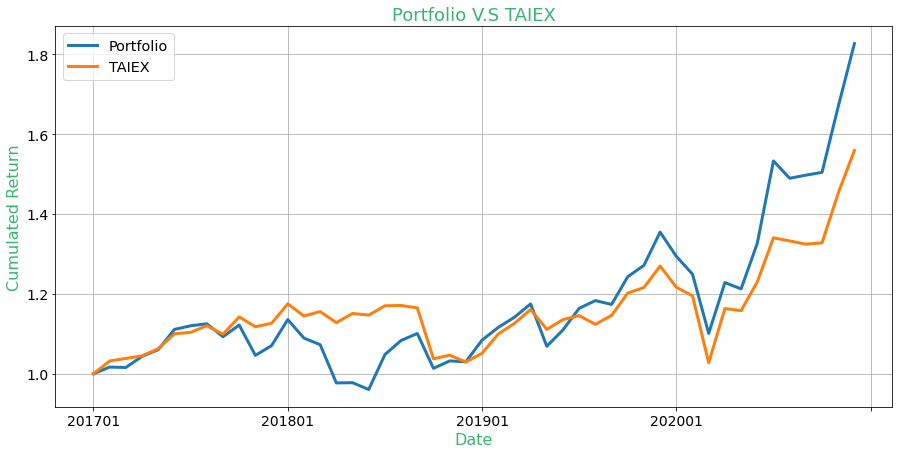

In [130]:
fig, ax = plt.subplots(figsize=(15,7))

plt.plot(returns1['Port_return_Cum'],label='Portfolio', linewidth=3)
plt.plot(TAIEX['Return_M_Cum'],label='TAIEX', linewidth=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(12))

plt.title('Portfolio V.S TAIEX',size = 18, color = 'mediumseagreen')
plt.xlabel('Date', fontsize=16, color = "mediumseagreen")
plt.ylabel('Cumulated Return', fontsize=16, color= "mediumseagreen")
plt.grid(True)
plt.legend(fontsize="x-large")
plt.xticks(fontsize=14 )
plt.yticks(fontsize=14 )
# plt.savefig("TAIEX.png",dpi=150)